# This repo is for performing EDA on the data

## Table of contents
- [Setup](#setup)
- [Loading and analyzing the data](#loading-and-analyzing-the-data)
    - [Scratching the surface](#scratching-the-surface)
        - [Drop Project ID](#drop-project-id)
        - [The distribution of the data](#The-distribution-of-the-data)
        - [Column by column initial analysis](#Column-by-column-initial-analysis)
    - [Digging deeper into the numerical cols](#Digging-deeper-into-the-numerical-cols)
        - [Item ID and Purchase Order ID](#Item-ID-and-Purchase-Order-ID)
    - [Setup](#setup)
    - [Setup](#setup)
    - [Setup](#setup)
    - [Setup](#setup)
    - [Setup](#setup)




# Setup

In [1]:
# Setup the envionment via these CLIs
"""
py -3.10 -m venv .venv
.venv\Scripts\activate
pip install -r requirements.txt
"""

'\npy -3.10 -m venv .venv\n.venv\\Scripts\x07ctivate\npip install -r requirements.txt\n'

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and analyzing the data

In [ ]:
data_path = "../data/purchase-order-items.xlsx"
df_original = pd.read_excel(data_path)

## Scratching the surface
I usually start with the meta info on the data then dig deeper into each column

In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


In [11]:
df_original.isnull().sum()

Item ID                 0
Item Name             240
Quantity                0
Total Bcy               0
Sub Total Bcy           0
Purchase Order ID       0
Product ID            240
Currency Code           0
Account ID              0
Tax ID                 65
Project ID           3150
dtype: int64

Alright so overall the data misses some values but not too much, specifically:
- Item Name: 240 values 
- Product ID, similarly: 240 (could be correlated columns)
- Tax ID: 65
- Project ID: completely empty - drop and focus on the rest as it has no value in analysis

### Drop Project ID

In [ ]:
df = df_original.drop("Project ID", axis=1)

### The distribution of the data

In [14]:
df.describe()

,Item ID,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Account ID,Tax ID
count,3.150000e+03,3150.000000,3.150000e+03,3.150000e+03,3.150000e+03,2.910000e+03,3.150000e+03,3.085000e+03
mean,3.263831e+18,475.470797,4.853890e+04,4.854089e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18
std,7.627889e+06,2737.024475,1.046032e+05,1.046032e+05,7.629406e+06,7.281519e+06,1.174301e+03,1.536249e+03
min,3.263831e+18,0.150000,0.000000e+00,0.000000e+00,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18
25%,3.263831e+18,7.000000,2.001473e+03,2.001473e+03,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18
50%,3.263831e+18,30.000000,1.235133e+04,1.237840e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18
75%,3.263831e+18,130.000000,5.599900e+04,5.599900e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18
max,3.263831e+18,70000.000000,1.519000e+06,1.519000e+06,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18


hmm the values are too large to see get intrepetable stats, let's visualize instead

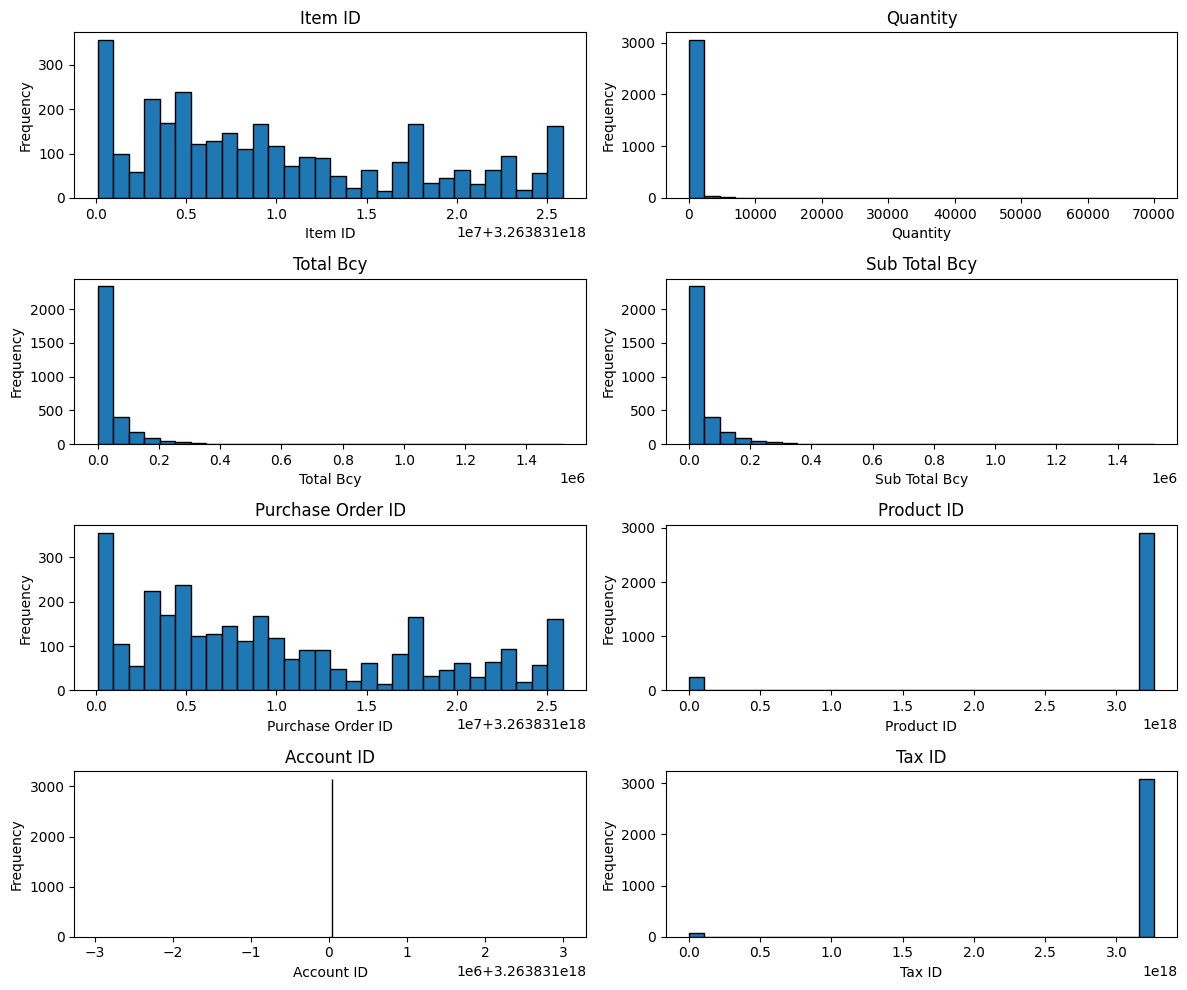

In [21]:
# AI-Assisted Cell to generate plots
num_cols = df.select_dtypes(include='number').columns

# Create a new df with NaN replaced by 0
num_df = df[num_cols].astype(float).fillna(0)

fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, col in zip(axes, num_df.columns):
    vals = num_df[col].to_numpy()
    ax.hist(vals, bins=30, edgecolor='k')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Column by column initial analysis
- Item ID appears to be reused quite often, but still has a wide range which indicates a lot of different items were purchased but many were repeated purchases.
- Quantity has a huge right tail (right skewed) some outliers were purchased in large quantities but most lie below 5000.
- Total Bcy and Sub Total Bcy are similarly right skewed. They appear to have a very similar distrubtion.
- Purchase Order ID appears to follow the same distribution as Item ID. Are these duplicates?
- Product ID is overwhelmingly one value, the rest could've been zeroed out nulls.
- Account ID is strange, need to invistigate more.
- Tax ID is also overwhelmingly one value, the others nulls?

## Digging deeper into the numerical cols
The analysis above prompts further invistigation into each column and some columns' correlation

### Item ID and Purchase Order ID
These follow an oddly similar distribution, let's see if they exactly match